In [1]:
# For data generation
import sys
# !{sys.executable} -m pip install xgboost --upgrade
import shutil
import os
import numpy as np
from glob import glob
import re
import pandas as pd
import pickle
#random
from time import perf_counter

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV


#Plotting
import seaborn as sns
sns.set_style()
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 200

import warnings
# warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 


from tqdm.auto import tqdm
# from tqdm.notebook import tqdm_notebook as tqdm

In [2]:
with open('test_ind.pickle', 'rb') as handle:
    test_ind = pickle.load(handle)

with open('train_ind.pickle', 'rb') as handle:
    train_ind = pickle.load(handle)
    
print(len(train_ind),len(test_ind))    


76 76


In [3]:
feat_name=['From_Same_Orbital', 'pair_energy', 'coulomb', 'screen1_1', 'screen1_2',
       'screen1_3', 'screen1_4', 'screen2_1', 'screen2_2', 'screen2_3',
       'screen2_4', 'eijab_1', 'eijab_2', 'eijab_3', 'eijab_4', 'screenvirt_1',
       'screenvirt_2', 'screenvirt_3', 'screenvirt_4', 'Fr1', 'Fr2', 'Fr3',
       'Fr4', 'Fs1', 'Fs2', 'Fs3', 'Fs4', 'occr1', 'occr2', 'occr3', 'occr4',
       'occs1', 'occs2', 'occs3', 'occs4', 'SCFFr1', 'SCFFr2', 'SCFFr3',
       'SCFFr4', 'SCFFs1', 'SCFFs2', 'SCFFs3', 'SCFFs4', 'SCFOCCr1',
       'SCFOCCr2', 'SCFOCCr3', 'SCFOCCr4', 'SCFOCCs1', 'SCFOCCs2', 'SCFOCCs3',
       'SCFOCCs4', 'hrr1', 'hrr2', 'hrr3', 'hrr4', 'hss1', 'hss2', 'hss3',
       'hss4', 'hpp', 'hqq', 'Fp', 'Fq', 'occp', 'occq', 'SCFFp', 'SCFFq',
       'SCFOCCp', 'SCFOCCq']

# feat_name=['occs3',
#  'SCFOCCs2',
#  'SCFOCCs1',
#  'screen2_1',
#  'SCFOCCp',
#  'hss4',
#  'hrr1',
#  'Fs2',
#  'occq',
#  'screenvirt_4',
#  'SCFFs2',
#  'hrr3',
#  'SCFFr1',
#  'screenvirt_2',
#  'screenvirt_3',
#  'SCFFs4',
#  'hss2',
#  'screen1_2',
#  'hrr4',
#  'screen1_3',
#  'Fp',
#  'Fr1',
#  'screenvirt_1',
#  'occs4',
#  'screen2_4',
#  'SCFFr2',
#  'eijab_2',
#  'screen2_3',
#  'SCFFs1',
#  'eijab_4',
#  'Fq',
#  'hss1',
#  'SCFFr4',
#  'occs2',
#  'occp',
#  'screen1_4',
#  'eijab_1',
#  'hpp',
#  'pair_energy',
#  'hrr2',
#  'hqq',
#  'SCFFr3',
#  'occs1',
#  'Fr2',
#  'eijab_3',
#  'SCFOCCq',
#  'SCFOCCs4',
#  'Fs3',
#  'Fs1',
#  'From_Same_Orbital',
#  'hss3',
#  'Fs4',
#  'SCFOCCs3',
#  'Fr4',
#  'screen2_2',
#  'screen1_1',
#  'Fr3',
#  'SCFFs3']

# feat_name=['SCFFs3',
#  'hrr3',
#  'screen1_1',
#  'SCFOCCs2',
#  'hpp',
#  'SCFOCCs3',
#  'hss4',
#  'screen2_2',
#  'SCFOCCq',
#  'hss1',
#  'screenvirt_3',
#  'SCFFs4',
#  'SCFFr4',
#  'SCFOCCs1',
#  'SCFFr3',
#  'hss2',
#  'screen2_4',
#  'screenvirt_2',
#  'SCFFs2',
#  'hss3',
#  'hqq',
#  'hrr4',
#  'hrr1',
#  'screen1_3',
#  'SCFOCCs4',
#  'SCFFr1',
#  'SCFFs1',
#  'hrr2',
#  'SCFFr2',
#  'screen1_4',
#  'screen2_1',
#  'screenvirt_1',
#  'screen1_2',
#  'SCFOCCp',
#  'screen2_3',
#  'screenvirt_4']


In [4]:
# Xcheck=pd.DataFrame(np.vstack([np.vstack(train_X),np.vstack(test_X)]),columns=feat_name)

In [5]:
train_X=[]
train_y = []

test_X=[]
test_y = []

nam='O3/fixed_feats.pickle'
trydf=pd.read_pickle(nam).astype(float)[feat_name]  
# trydf.set_index(trydf.index.set_levels([int(i.split('/')[1].split('_')[1]) for i in trydf.index.levels[0]],level=0),inplace=True)

for i in train_ind:
    train_X.append(trydf.loc[f"{i:.2f}"].values)
for j in test_ind: 
    test_X.append(trydf.loc[f"{j:.2f}"].values)
    

In [6]:
trydf

From_Same_Orbital  pair_energy   coulomb  screen1_1  screen1_2  \
161.00 A1_A1                1.0    -1.929173  0.000000   0.374993   0.374993   
       A1_A2                0.0    -0.183646  0.000000   0.189855   0.374993   
       A1_A3                0.0    -0.001000  0.000000   0.374993   0.189855   
       A2_A1                0.0    -0.183646  0.000000   0.348033   0.443104   
       A2_A2                1.0    -2.701998  0.000000   0.450784   0.450784   
...                         ...          ...       ...        ...        ...   
158.00 I9_I5                0.0    -0.073049  0.474882   0.459991   0.459991   
       I9_I6                0.0    -0.285377  0.477946   0.372528   0.372528   
       I9_I7                0.0    -0.001851  0.431135   0.424623   0.424623   
       I9_I8                0.0    -0.006334  0.433404   0.459991   0.459991   
       I9_I9                1.0    -2.248401  0.498277   0.462871   0.468016   

              screen1_3  screen1_4  screen2_1  screen2_2  screen2_3  ...  \
161.00 A1_A1   0.439328   0.341702   0.374993   0.374993   0.439328  ...   
       A1_A2   0.232863   0.232863   0.000000   0.000000   0.000000  ...   
       A1_A3   0.374993   0.232863   0.000000   0.000000   0.000000  ...   
       A2_A1   0.450784   0.450784   0.000000   0.374993   0.374993  ...   
       A2_A2   0.450784   0.443104   0.450784   0.450784   0.450784  ...   
...                 ...        ...        ...        ...        ...  ...   
158.00 I9_I5   0.341279   0.341279   0.475680   0.475680   0.475680  ...   
       I9_I6   0.482271   0.482271   0.458270   0.458270   0.458270  ...   
       I9_I7   0.372528   0.372528   0.513579   0.513579   0.513579  ...   
       I9_I8   0.341279   0.341279   0.475945   0.475945   0.475945  ...   
       I9_I9   0.465083   0.433430   0.462871   0.468016   0.462871  ...   

                hpp    hqq      Fp       Fq      occp      occq    SCFFp  \
161.00 A1_A1 -11.12 -11.12 -0.7333 -0.73330  1.999491  1.999491  0.00000   
       A1_A2 -11.12 -11.12 -0.7333 -0.45510  1.999491  1.527626  0.00000   
       A1_A3 -11.12 -11.12 -0.7333 -0.03768  1.999491  0.472883  0.00000   
       A2_A1 -12.09 -12.09 -0.4551 -0.73330  1.527626  1.999491  0.00000   
       A2_A2 -12.09 -12.09 -0.4551 -0.45510  1.527626  1.527626  0.00000   
...             ...    ...     ...      ...       ...       ...      ...   
158.00 I9_I5 -11.66 -11.66 -0.6081 -1.44800  2.000000  2.000000 -0.62523   
       I9_I6 -11.66 -11.66 -0.6081 -1.05400  2.000000  2.000000 -0.62523   
       I9_I7 -11.66 -11.66 -0.6081 -0.79620  2.000000  2.000000 -0.62523   
       I9_I8 -11.66 -11.66 -0.6081 -0.78080  2.000000  2.000000 -0.62523   
       I9_I9 -11.66 -11.66 -0.6081 -0.60810  2.000000  2.000000 -0.62523   

                 SCFFq   SCFOCCp   SCFOCCq  
161.00 A1_A1  0.000000  1.999491  1.999491  
       A1_A2  0.000000  1.999491  1.527626  
       A1_A3  0.000000  1.999491  0.472883  
       A2_A1  0.000000  1.527626  1.999491  
       A2_A2  0.000000  1.527626  1.527626  
...                ...       ...       ...  
158.00 I9_I5 -1.447832  2.000000  2.000000  
       I9_I6 -1.044865  2.000000  2.000000  
       I9_I7 -0.803786  2.000000  2.000000  
       I9_I8 -0.764665  2.000000  2.000000  
       I9_I9 -0.625230  2.000000  2.000000  

[14288 rows x 69 columns]

In [7]:
# This recover is wrong... did not account for the # of pair-energies     
recover_train=[]    
recover_test=[]    
tst_idx=0
tr_idx=0
for nidx,nam in enumerate(glob('*/fixed_targets.pickle')):
    print(nam)
    tryy=pd.read_pickle(nam).astype(float)
    Hnam=nam.split('/')[0].split('_')[0]
    for tridx,i in enumerate(train_ind):
        pairdf=tryy[f"{i:.2f}"].values
        train_y.append(pairdf)
        for k in range(len(pairdf)):
            recover_train.append((float(i),tridx,tr_idx))
            tr_idx+=1
        
    for teidx,j in enumerate(test_ind): 
        pairdf=tryy[f"{j:.2f}"].values
        test_y.append(pairdf)        
        
        for k in range(len(pairdf)):
            recover_test.append((float(j),teidx,tst_idx))
            tst_idx+=1

O3/fixed_targets.pickle


In [8]:
X_train, X_test=np.vstack(train_X).astype(float),np.vstack(test_X).astype(float)
for u,v in np.argwhere(np.isnan(X_train)):
    X_train[u,v]=0
    
for u,v in np.argwhere(np.isnan(X_test)):
    X_test[u,v]=0    

In [9]:
y_train,y_test=np.hstack(train_y).astype(float),np.hstack(test_y).astype(float)

In [10]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [11]:
print(X_train.shape,X_test.shape)

(7144, 69) (7144, 69)


In [12]:
from xgboost import XGBRegressor
# model=XGBRegressor(reg_lambda=0.3,max_depth=100,min_child_weight=5)
# model=XGBRegressor(max_depth=100,min_child_weight=1,n_estimators=100, reg_alpha=0.001, reg_lambda=0.001)
# model.fit(X_train,y_train)
# y_pred_train=model.predict(X_train)
# y_pred_test=model.predict(X_test)
# print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
# print(f"RMSE (mEh): {mean_squared_error(y_train,y_pred_train,squared=False)*1e3:.4f},{mean_squared_error(y_test,y_pred_test,squared=False)*1e3:.4f}")

params = {'max_depth': [1, 10, 100],
          'n_estimators': [100, 500, 1000],
          'reg_lambda': [1e-6, 1e-3,1e-1],
          'reg_alpha': [1e-6, 1e-3,1e-1]}

model = XGBRegressor()
grid = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring='r2', 
                   verbose=1000,n_jobs=12).fit(X_train,y_train)


gmodel=grid.best_estimator_
gmodel.device = 'cuda:0'
y_pred_train=gmodel.predict(X_train)
y_pred_test=gmodel.predict(X_test)
print(f"R2: {r2_score(y_train,y_pred_train):.4f},{r2_score(y_test,y_pred_test):.4f}")
print(f"RMSE (mEh): {mean_squared_error(y_train,y_pred_train,squared=False)*1e3:.4f},{mean_squared_error(y_test,y_pred_test,squared=False)*1e3:.4f}")



Fitting 5 folds for each of 81 candidates, totalling 405 fits
R2: 0.9915,0.9849
RMSE (mEh): 1.6775,2.2362


/home/grierjones/miniconda3/envs/DDGNN/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/grierjones/miniconda3/envs/DDGNN/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


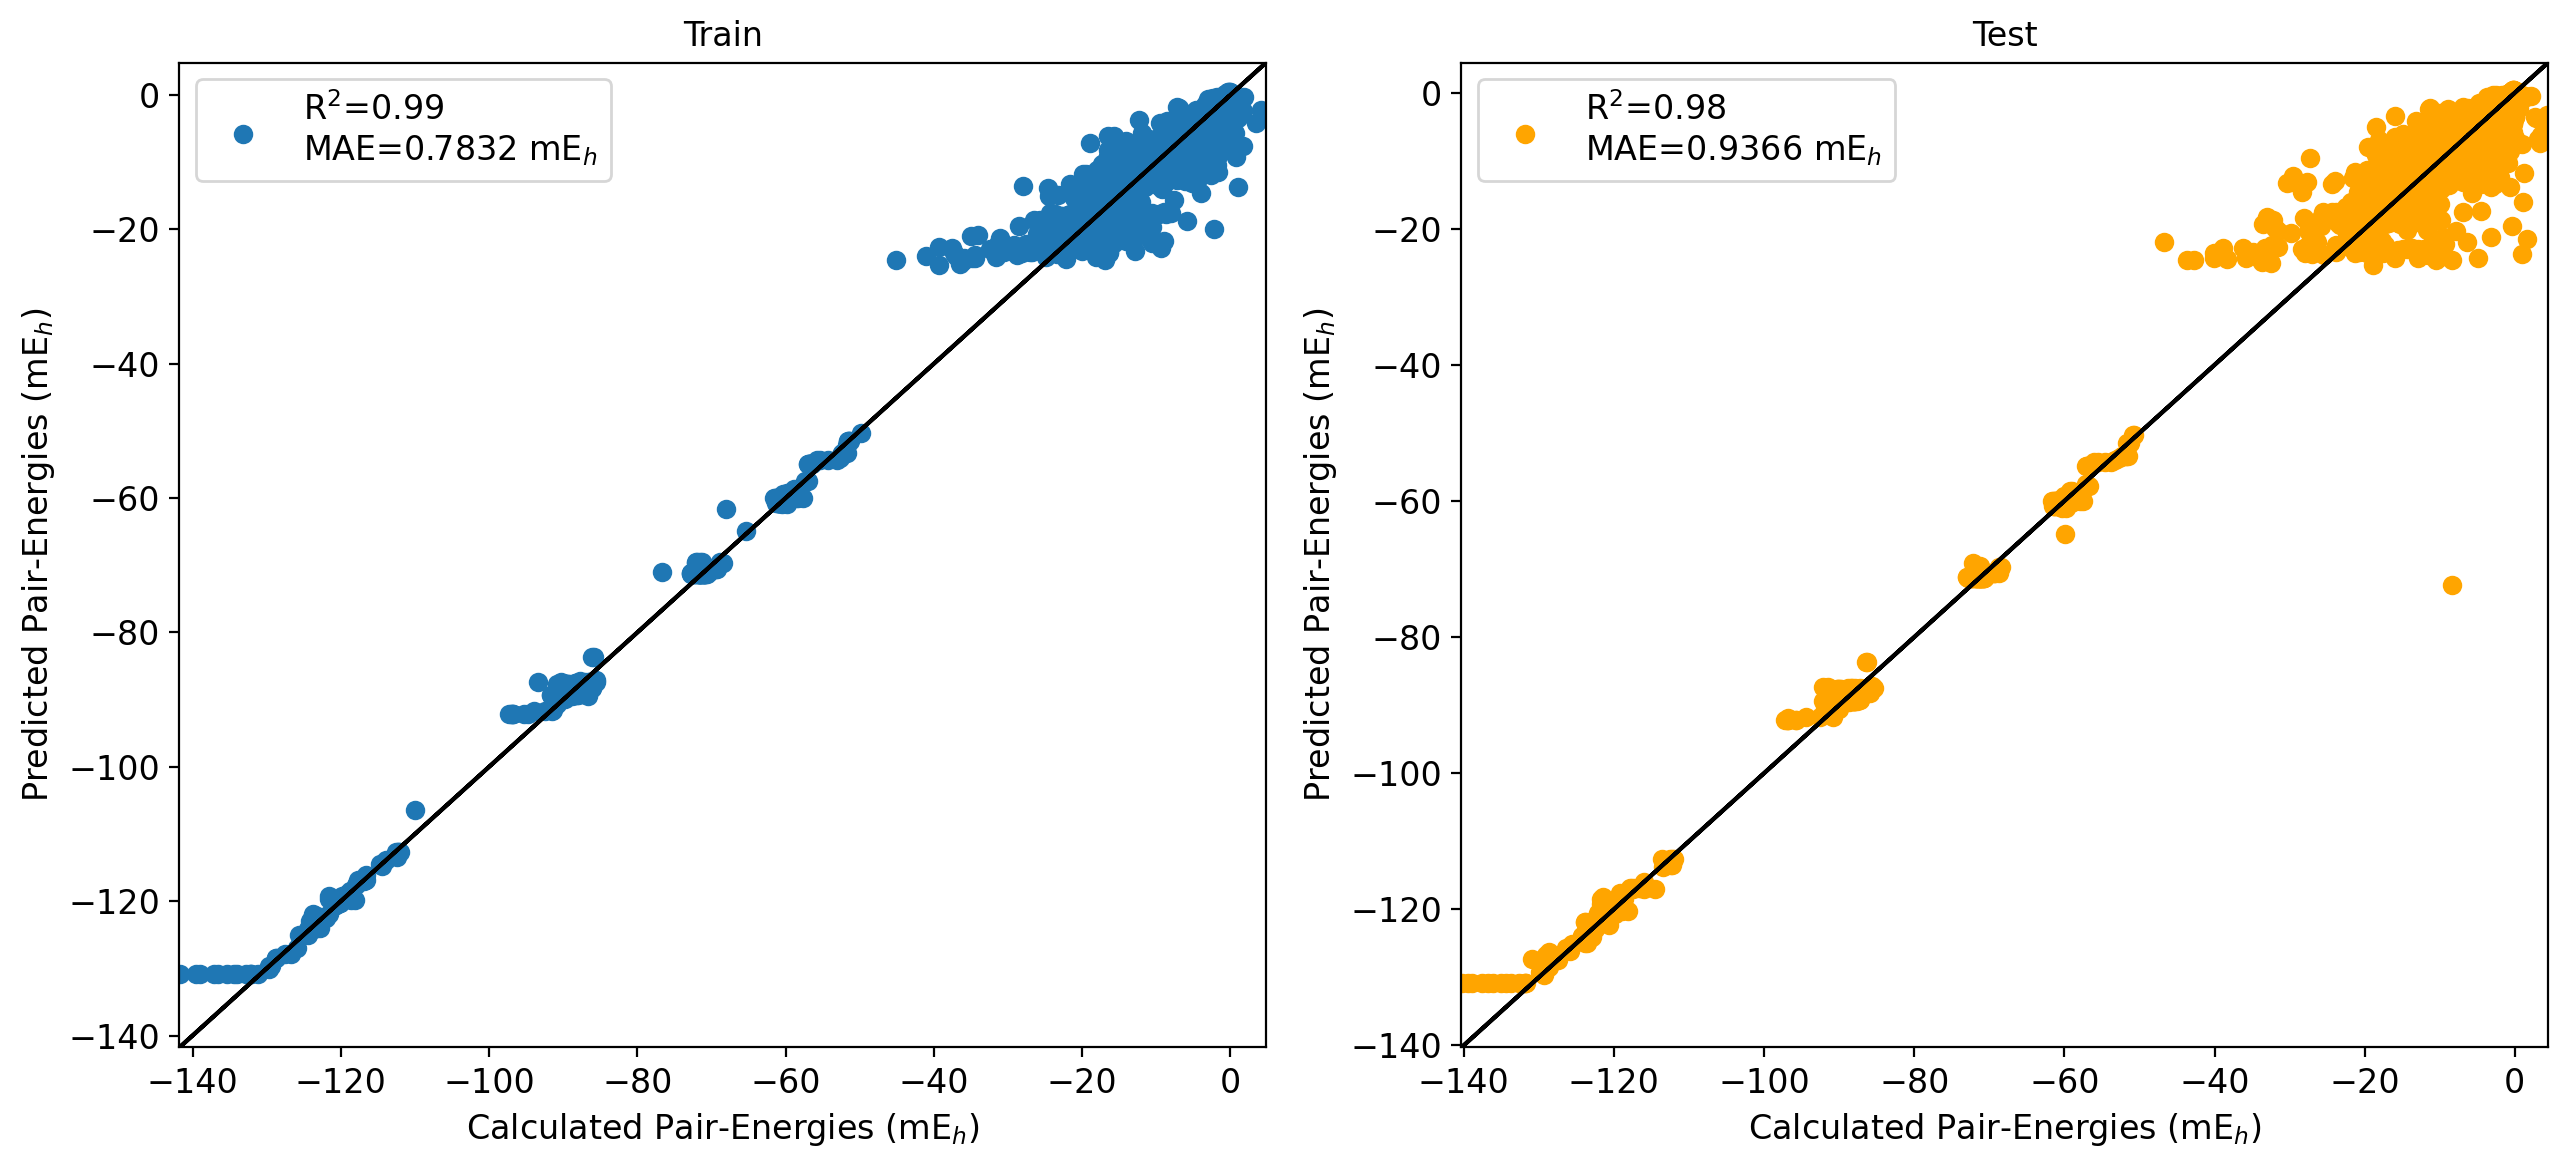

In [13]:
font=12
plt.rc('font', size=font)          # controls default text sizes
plt.rc('axes', titlesize=font)     # fontsize of the axes title
plt.rc('axes', labelsize=font)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font)    # fontsize of the tick labels
plt.rc('legend', fontsize=font)    # legend fontsize
plt.rc('figure', titlesize=font)  # fontsize of the figure title
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,6))
scale=1e-1
ax1.set_title('Train')
ax1.scatter(1e3*y_train,1e3*y_pred_train,label="R$^{2}$="+f'{r2_score(y_train,y_pred_train):.2f}\nMAE={1e3*mean_absolute_error(y_train,y_pred_train):.4f}'+" mE$_{h}$")
ax1.plot(1e3*y_train,1e3*y_train,'k-')
ax1.set_xlim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_ylim(1e3*min(y_train)-scale,1e3*max(y_train)+scale)
ax1.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax1.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax1.legend()


ax2.set_title('Test')
ax2.scatter(1e3*y_test,1e3*y_pred_test,label="R$^{2}$="+f'{r2_score(y_test,y_pred_test):.2f}\nMAE={1e3*mean_absolute_error(y_test,y_pred_test):.4f}'+" mE$_{h}$",color='orange')
ax2.plot(1e3*y_test,1e3*y_test,'k-')
ax2.set_xlim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_ylim(1e3*min(y_test)-scale,1e3*max(y_test)+scale)
ax2.set_xlabel('Calculated Pair-Energies (mE$_{h}$)')
ax2.set_ylabel('Predicted Pair-Energies (mE$_{h}$)')
ax2.legend()
if os.path.exists('images')==False:
    os.mkdir('images')
plt.tight_layout()
plt.savefig('images/O3_parity.png',dpi=300,bbox_inches='tight')
plt.show()

In [14]:
testdct=[np.vstack((y_test[np.array(recover_test)[np.array(recover_test)[:,1].astype(int)==i][:,2].astype(int)],y_pred_test[np.array(recover_test)[np.array(recover_test)[:,1].astype(int)==i][:,2].astype(int)])) for i in np.unique(np.array(recover_test)[:,1].astype(int))]

test_errors=mean_absolute_error(np.hstack(testdct)[0],np.hstack(testdct)[1])*1e3

In [15]:
traindct=[np.vstack((y_train[np.array(recover_train)[np.array(recover_train)[:,1].astype(int)==i][:,2].astype(int)],y_pred_train[np.array(recover_train)[np.array(recover_train)[:,1].astype(int)==i][:,2].astype(int)])) for i in np.unique(np.array(recover_train)[:,1].astype(int))]

train_errors=mean_absolute_error(np.hstack(traindct)[0],np.hstack(traindct)[1])*1e3

In [16]:
CASSCF=pd.concat([pd.read_csv(i,index_col=1).drop(columns=['Unnamed: 0']).rename(columns={'energy':i.split('_')[0]}) for i in glob('*/CASSCF.csv')],axis=1)
CASPT2=pd.concat([pd.read_csv(i,index_col=1).drop(columns=['Unnamed: 0']).rename(columns={'energy':i.split('_')[0]}) for i in glob('*/CASPT2.csv')],axis=1)
E2=pd.concat([pd.read_csv(i,index_col=1).drop(columns=['Unnamed: 0']).rename(columns={'energy':i.split('_')[0]}) for i in glob('*/E2.csv')],axis=1)    

# CASSCF.index=[f'{int(i)}' for i in CASSCF.index]
# CASPT2.index=[f'{int(i)}' for i in CASPT2.index]
# E2.index=[f'{int(i)}' for i in E2.index]

In [17]:
pairedcp=sns.color_palette('Paired')

In [18]:
test_E2={np.unique(np.array(recover_test)[:,0])[idx]:{'true':sum(u),'pred':sum(v)} for idx,(u,v) in enumerate(testdct)}
train_E2={np.unique(np.array(recover_train)[:,0])[idx]:{'true':sum(u),'pred':sum(v)} for idx,(u,v) in enumerate(traindct)}

In [19]:
mean_absolute_error(CASSCF.values,CASPT2.values)

np.float64(0.6923756174342102)

In [20]:
CASPT2.loc[106.0]

O3/CASPT2.csv   -225.287154
Name: 106.0, dtype: float64

In [21]:
[(k,v['pred']) for k,v in train_E2.items()]

[(np.float64(106.0), np.float64(-0.673341251706006)),
 (np.float64(107.0), np.float64(-0.6816368113504723)),
 (np.float64(108.0), np.float64(-0.687204728848883)),
 (np.float64(109.0), np.float64(-0.6814263667183695)),
 (np.float64(110.0), np.float64(-0.6915924815984908)),
 (np.float64(111.0), np.float64(-0.6895539626275422)),
 (np.float64(112.0), np.float64(-0.687647019585711)),
 (np.float64(113.0), np.float64(-0.684933067485872)),
 (np.float64(114.0), np.float64(-0.6842765078299635)),
 (np.float64(115.0), np.float64(-0.6947625720031283)),
 (np.float64(116.0), np.float64(-0.691611327024475)),
 (np.float64(117.0), np.float64(-0.6872514521064659)),
 (np.float64(118.0), np.float64(-0.6882036805873213)),
 (np.float64(119.0), np.float64(-0.6912760702143714)),
 (np.float64(120.0), np.float64(-0.6878004045029229)),
 (np.float64(121.0), np.float64(-0.6858545216891798)),
 (np.float64(122.0), np.float64(-0.6885339297514292)),
 (np.float64(123.0), np.float64(-0.6894402443940635)),
 (np.float64(12

In [22]:
[(k,(CASSCF.loc[k].values+v['pred'])[0]) for k,v in train_E2.items()]

[(np.float64(106.0), np.float64(-225.275450091706)),
 (np.float64(107.0), np.float64(-225.28793476135047)),
 (np.float64(108.0), np.float64(-225.29476388884888)),
 (np.float64(109.0), np.float64(-225.29004763671836)),
 (np.float64(110.0), np.float64(-225.30108398159848)),
 (np.float64(111.0), np.float64(-225.29973108262755)),
 (np.float64(112.0), np.float64(-225.2983315195857)),
 (np.float64(113.0), np.float64(-225.29595325748588)),
 (np.float64(114.0), np.float64(-225.29546622782996)),
 (np.float64(115.0), np.float64(-225.30596156200312)),
 (np.float64(116.0), np.float64(-225.30266442702447)),
 (np.float64(117.0), np.float64(-225.29800849210648)),
 (np.float64(118.0), np.float64(-225.29851923058732)),
 (np.float64(119.0), np.float64(-225.30100940021438)),
 (np.float64(120.0), np.float64(-225.29681498450293)),
 (np.float64(121.0), np.float64(-225.29401768168918)),
 (np.float64(122.0), np.float64(-225.29571740975143)),
 (np.float64(123.0), np.float64(-225.29551930439408)),
 (np.float64(

In [23]:
melted_train=np.array([(k,(CASSCF.loc[k].values+v['pred'])[0]) for k,v in train_E2.items()]).astype(float)
melted_test=np.array([(k,(CASSCF.loc[k].values+v['pred'])[0]) for k,v in test_E2.items()]).astype(float)

In [24]:


mean_absolute_error(CASPT2.values,pd.DataFrame(np.vstack([melted_train,melted_test]),columns=['angle','CASPT2']).set_index('angle').sort_index().values)

np.float64(0.0039010484597987727)

In [25]:
CASPT2.mean()

O3/CASPT2.csv   -225.243268
dtype: float64

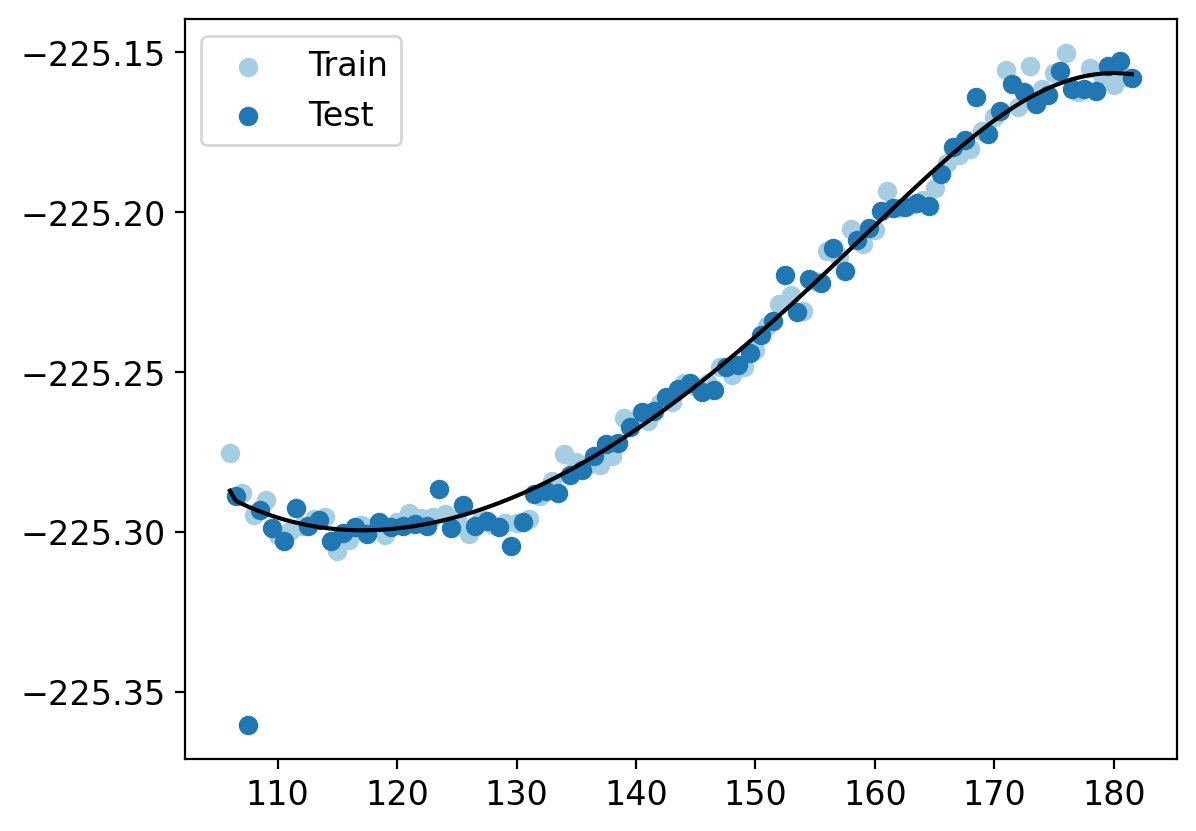

In [26]:
pal=sns.color_palette('Paired',2)
plt.plot(CASPT2.index,CASPT2.values,'k')
plt.scatter(melted_train[:,0],melted_train[:,1],color=pal[0],label='Train')
plt.scatter(melted_test[:,0],melted_test[:,1],color=pal[1],label='Test')
plt.legend()
plt.show()

In [27]:
mean_absolute_percentage_error([v['true'] for k,v in train_E2.items()],[v['pred'] for k,v in train_E2.items()])

np.float64(0.0051249683128713665)

In [28]:
mean_absolute_percentage_error([v['true'] for k,v in test_E2.items()],[v['pred'] for k,v in test_E2.items()])

np.float64(0.006158179564675884)

In [29]:
mean_absolute_error([v['true'] for k,v in test_E2.items()],[v['pred'] for k,v in test_E2.items()])

np.float64(0.004255588679010679)

In [30]:
mean_absolute_error([v['true'] for k,v in train_E2.items()],[v['pred'] for k,v in train_E2.items()])

np.float64(0.0035467084488833597)

<Axes: xlabel='true', ylabel='pred'>

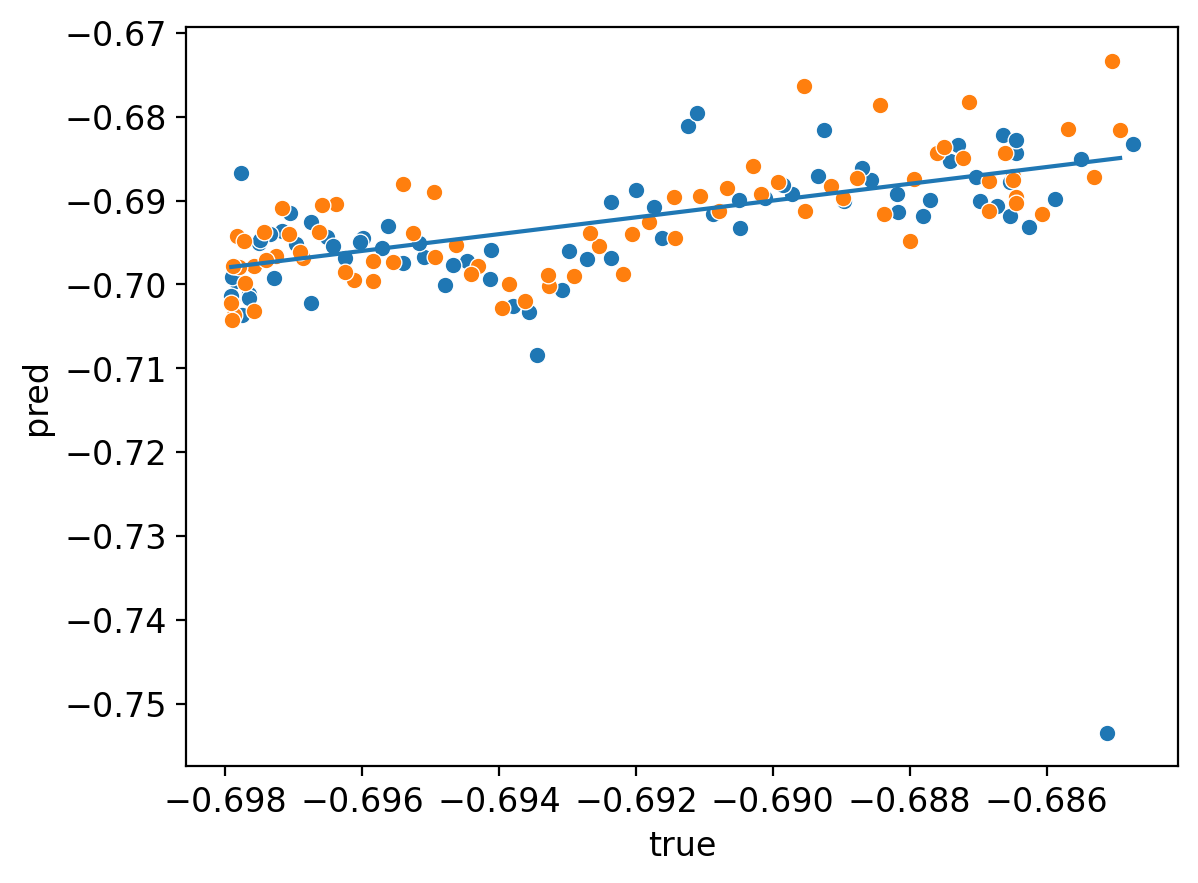

In [31]:
sns.scatterplot(data=pd.DataFrame.from_dict(test_E2).T,x='true',y='pred')
sns.scatterplot(data=pd.DataFrame.from_dict(train_E2).T,x='true',y='pred')
sns.lineplot(data=pd.DataFrame.from_dict(train_E2).T,x='true',y='true')